
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pycountry_convert as pc

In [2]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [3]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [5]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15
BookingsNoShowed,111733,NaN,NaN,NaN,0.000599644,0.0282168,0,0,0,0,3


In [6]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [7]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

,MarketSegment
Other,63680
Direct,16363
Travel Agent/Operator,16353
Groups,11461
Corporate,2931
Complementary,657
Aviation,288


In [8]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

,DistributionChannel
Travel Agent/Operator,91019
Direct,16883
Corporate,3135
GDS Systems,696


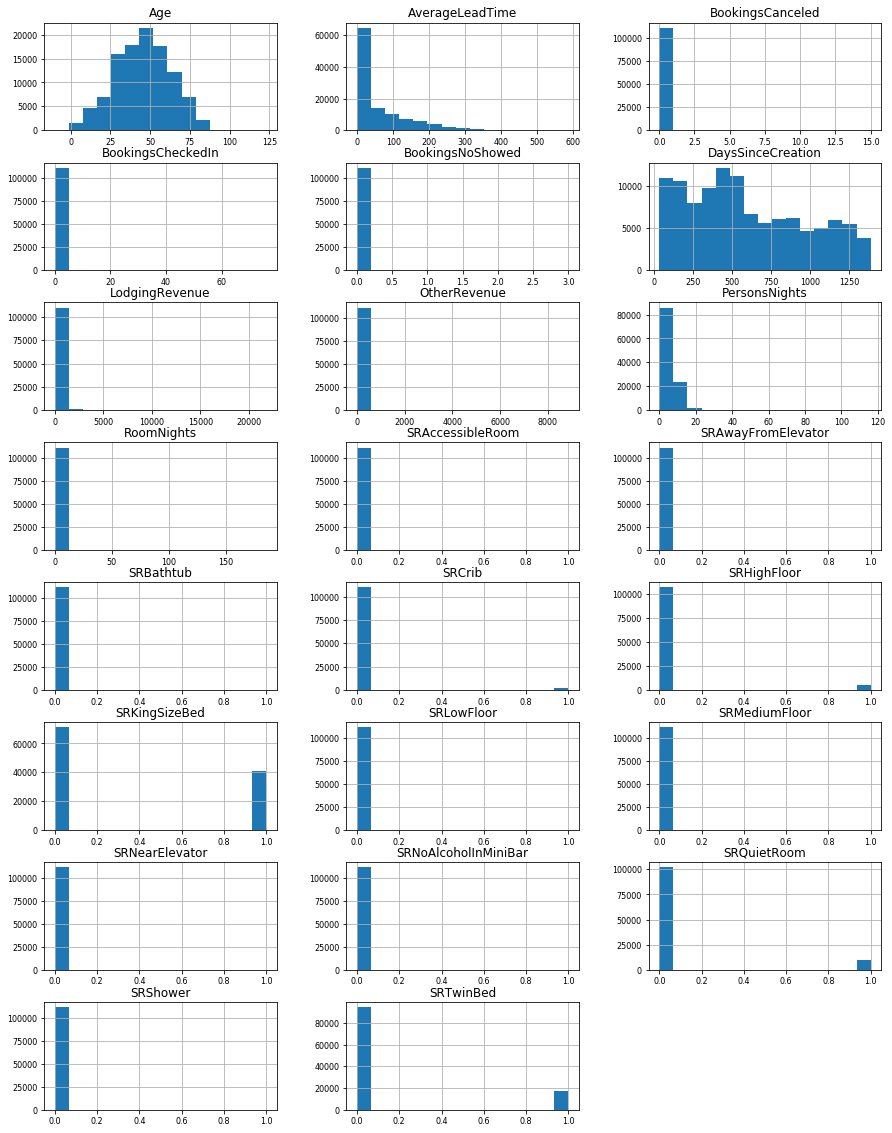

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

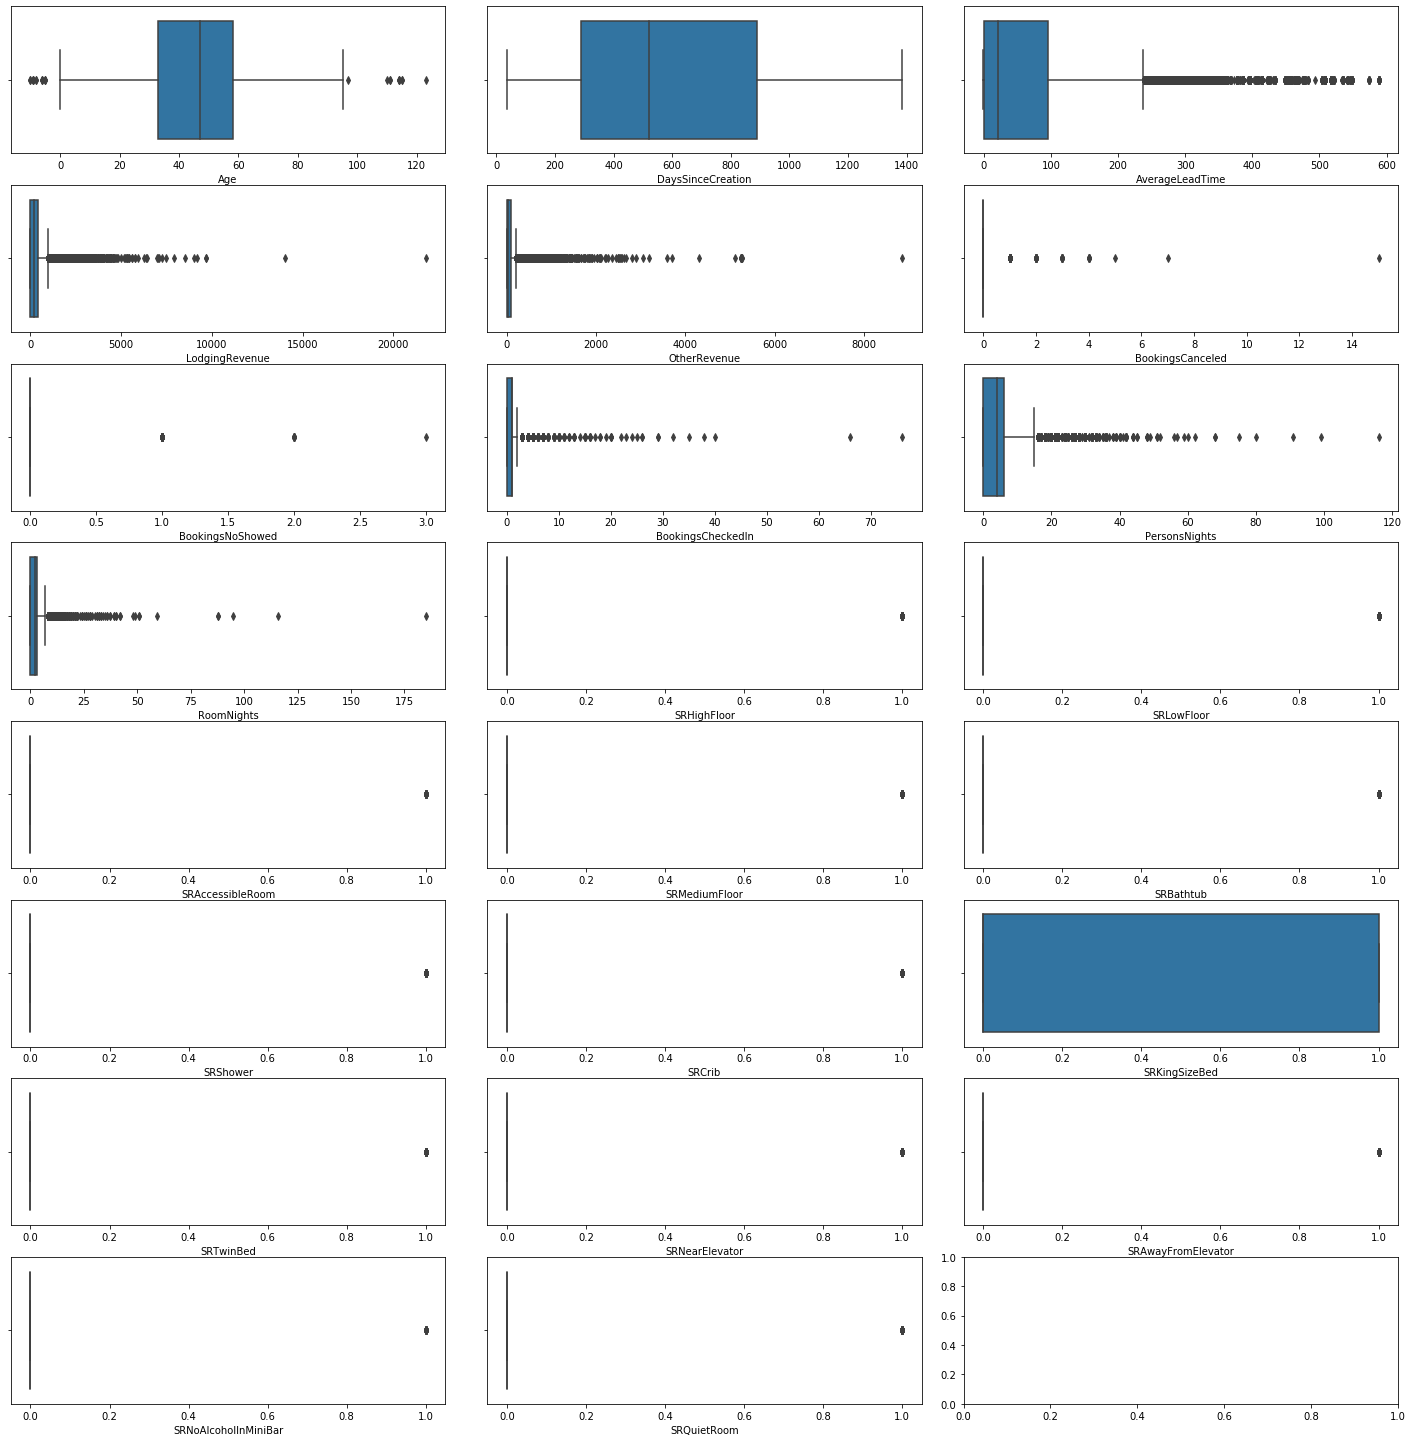

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

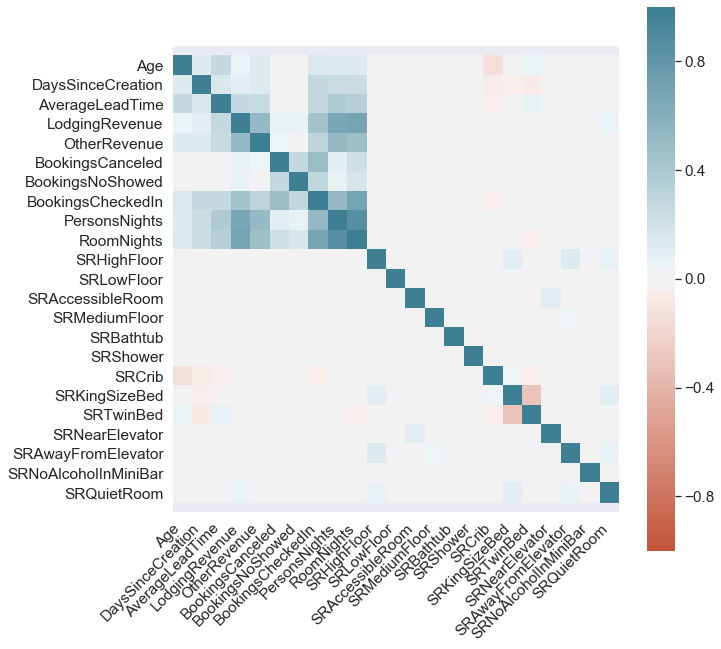

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,FRA,57.0,1385,0x4DCD77E3D2E2CC9E22007657A9FD76DC517A32B6AFED...,0x670102CA121D0317A5AA2047ED6D63535A1E7177DEC5...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,ESP,58.0,1385,0x687F687634AB73BF29FF942F4E32781663FE00ACAD25...,0x24BE7F0DC5BB617D19234A7C338B9723F55833265C31...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,FRA,72.0,1385,0xA72500CAF0F282A35AA333F7F3D09CE0157F6AEAB525...,0x0FA6748AEF42771528A93C08BE13EF84F704E7C8F5D1...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,FRA,27.0,1385,0x60D60695D7E3650D5C35B0DF105F85134450F8456C4D...,0x465FA5F32DE6BF5C84493F791F3DC03DBB7CCA541FB1...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [15]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [16]:
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

In [17]:
#Merge remaining duplicated rows with same DocIdHash
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [18]:
# Outlier handling 
# Treat negative AverageLeadTime as real time booking; averageleadtime = 0
#X_new[X_new.AverageLeadTime>360]

# Everything looks fine
#X_new[X_new.LodgingRevenue > 10000]

#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
# Everything looks fine

#X_new[X_new.PricePerNight > 1500]

# Everything looks fine
#X_new[X_new.OtherRevenue > 4000]

#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights
#Remove inf cases
X_new = X_new[X_new.OtherRevenuePerPersonNight < 10000]


# Everything looks fine apart from inf
#X_new[X_new["OtherRevenuePerPersonNight"]>1000]

# Only 1 case where looks like staff (2.2€per night). Define a min price per night and drop customers below.
#X_new[X_new.BookingsCanceled > 14]

#Most clients have decent price per night/other revenue (most are corporate) and theres the staff guy from above.
#X_new[X_new.BookingsCheckedIn > 30]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.PersonsNights > 80]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.RoomNights > 75]





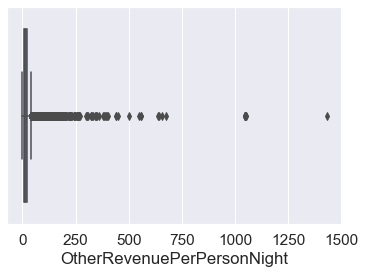

In [19]:
sns.boxplot(X_new["OtherRevenuePerPersonNight"])

In [20]:
X_new[X_new.RoomNights>X_new.PersonsNights]
#Check why this happens w/ teacher

,IDMerge,Nationality,Age,DaysSinceCreation,NameHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,PricePerNight,OtherRevenuePerPersonNight
2340,0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...,PRT,45.0,1288,0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...,75.000000,138.00,38.50,0,0,...,0,0,0,0,0,0,0,0,1.568182,19.250000
11593,0x27A6504F8E07DC750D565994E86CB3837146A501E609...,ESP,50.0,736,0x53FB0EB1CE1FD50424F79500C54F8149081D5A3D82F6...,15.250000,1931.00,133.00,0,0,...,0,0,0,0,0,0,0,0,66.586207,13.300000
11923,0x28D83B97B0D5B78BCBA1C36FDF79FF276A1E32C9CB5C...,PRT,34.0,489,0xFB5F026540ECB47362289BB2507D92BED41D80F632F6...,0.000000,459.00,42.00,0,0,...,0,0,1,0,0,0,0,0,38.250000,21.000000
12576,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,34.066667,11740.65,3066.50,5,1,...,0,0,1,0,0,0,0,0,88.944318,27.379464
18324,0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...,GRC,52.0,901,0x04F37DBBE0138585CD31BC820E2C780F992915176507...,7.000000,3066.00,347.30,0,0,...,0,0,1,0,0,0,0,0,102.200000,12.403571
22334,0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...,PRT,66.0,1189,0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...,38.000000,1239.00,230.00,4,0,...,0,0,1,0,0,0,0,0,56.318182,11.500000
26848,0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...,PRT,46.0,466,0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...,3.000000,269.00,7.00,0,1,...,0,0,1,0,0,0,0,0,134.500000,7.000000
28984,0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...,PRT,49.0,1112,0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...,0.000000,858.15,114.00,0,0,...,0,0,0,0,0,0,0,0,78.013636,28.500000
37749,0x849546932E0ABE7515ECA03635FD1334BBBCC41E0AFD...,BRA,33.0,319,0x3CBB385BBFE0BCBAC87A0F4FE0BFA648DE33905384F4...,0.000000,524.87,242.50,0,0,...,0,0,0,0,0,0,0,0,87.478333,48.500000
44925,0x9E0C31D4C3A418F0B4E063504160A0B33D51C6ABA0A4...,PRT,NaN,426,0x27749A514C58DA6E2F5544303DD02E378631187B08EF...,97.000000,3123.00,1056.75,0,0,...,0,0,1,0,0,0,0,0,130.125000,52.837500


In [21]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [22]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights
X_new["AvgNights"] = X_new.RoomNights / X_new.BookingsCheckedIn
X_new["GroupSize"] = round(X_new.PersonsNights / X_new.BookingsCheckedIn / X_new.AvgNights,0)

In [23]:
#Age Binning

X_new["AgeBinned"] = X_new.Age.apply(lambda x: '0-24' if x >= 0 and x <=24 else ('25-44' if x>=25 and x<=44 else ('45-64' if x>=45 and x<=64 else '65+')))
X_new.AgeBinned.value_counts()


45-64    31613
25-44    26481
65+      11025
0-24      3799
Name: AgeBinned, dtype: int64

In [24]:
#AvgNights binning
#1-2 Short Stay
#3-4 Medium
#5+ Long

X_new["AvgNightsBinning"] = X_new.AvgNights.apply(lambda x: '1-2' if x>=0 and x<=2.5 else ('3-4' if x>2.5 and x<=4.5 else '5+'))
X_new.AvgNightsBinning.value_counts()

3-4    32843
1-2    28748
5+     11327
Name: AvgNightsBinning, dtype: int64

In [25]:
#GroupSize Binning
#1
#2
#3+
X_new["GroupSizeBinned"] = X_new.GroupSize.apply(lambda x: '1' if x ==1  else ('2' if x==2 else '3+'))
X_new.GroupSizeBinned.value_counts()


2     47026
1     15789
3+    10103
Name: GroupSizeBinned, dtype: int64

In [26]:
#AverageLeadTime binning
#0-7
#8-30
#31-120
#121-365
#366+

X_new["LeadTimeBinned"] = X_new.AverageLeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else ('8-30' if x>=8 and x<31 else ('31-120' if x>=31 and x<121 else('121-365' if x>=121 and x<366 else '366+'))))


In [27]:
#DaysSinceCreation binning
#0-60
#60-365
#365-730
#730+

X_new["DaysSinceCreationBinned"] = X_new.DaysSinceCreation.apply(lambda x: '0-120' if x>=0 and x<=120 else ('121-365' if x>=121 and x<=365 else ('366-730' if x>=366 and x<=730 else'731+')))


In [28]:
#PersonPerRoom
#0-1,5
#1,5-2,5
#2,5 +

X_new["PersonPerRoomBinned"] = X_new.PersonPerRoom.apply(lambda x: '1' if x <1.5 else ('2' if x>=1.5 and x<2.5 else '3+'))


In [29]:
#'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom'

#Creature SR Location 

X_new["SRLocation"] = X_new["SRHighFloor"] + X_new["SRQuietRoom"]+X_new["SRLowFloor"] + X_new["SRMediumFloor"] + X_new["SRNearElevator"] + X_new["SRAwayFromElevator"]
X_new["SREquipment"] = X_new["SRAccessibleRoom"] + X_new["SRBathtub"] + X_new["SRShower"] + X_new["SRCrib"] + X_new["SRKingSizeBed"] + X_new["SRTwinBed"] + X_new["SRNoAlcoholInMiniBar"]
X_new.SRLocation = X_new.SRLocation.apply(lambda x: 1 if x>=1 else 0)
X_new.SREquipment = X_new.SREquipment.apply(lambda x: 1 if x>=1 else 0)

In [30]:
# Create new nationality feature with continent of nationality  

cc_alpha2 = [pc.country_alpha3_to_country_alpha2(x) if x != "TMP" else  "AQ" for x in X_new["Nationality"].values] 

X_new["Nationality2"] = [pc.country_alpha2_to_continent_code(x) if x not in ["AQ", "PN", "TF", "UM"] else "Undefined" for x in cc_alpha2] 

X_new["Nationality2"] = [X_new.Nationality2[i] if X_new.Nationality[i] not in ["PRT","GBR","DEU","FRA"] else X_new.Nationality[i]  for i in X_new.index.values] 

X_new["Nationality2"] = X_new["Nationality2"].apply(lambda x: x if x not in ["NA", "SA", "AF", "OC", "AS", "Undefined"] else "ROW") 

X_new["Nationality2"].value_counts() 

EU     24337
ROW    12087
FRA    11271
DEU    10277
GBR     7865
PRT     7081
Name: Nationality2, dtype: int64

In [32]:
#Feature engineering part2
#OneHotEncode the categorical variables,
categoricals = ["DistributionChannel","Nationality2", "GroupSizeBinned","AgeBinned","LeadTimeBinned", "DaysSinceCreationBinned","PersonPerRoomBinned", "AvgNightsBinning"]

dummies = pd.get_dummies(X_new[categoricals], prefix_sep='_')
X_new_2 = X_new.merge(dummies, left_index = True, right_index=True )

In [33]:
#Drop unnecessary columns for PCA
X_new_2.drop(["IDMerge", "Nationality","GroupSizeBinned","GroupSize","PersonsNights","AvgNights","RoomNights","AvgNightsBinning","BookingsCheckedIn","BookingsNoShowed","BookingsCanceled","PersonPerRoom","PersonPerRoomBinned", "Age",
              "DaysSinceCreationBinned","DaysSinceCreation","AgeBinned","LodgingRevenue","OtherRevenue", "LeadTimeBinned", "NameHash","AverageLeadTime",
              "DistributionChannel",'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 
              'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', "Nationality2",'SRAwayFromElevator',
              'SRNoAlcoholInMiniBar', 'SRQuietRoom'],axis=1, inplace=True)
#Standardize with MinMax
X_model = X_new_2.copy(deep=True)

cols = list(X_model.columns) # save the name of the columns 

X_model_array = X_model.values # returns a numpy array 

min_max_scaler = preprocessing.MinMaxScaler() 

X_model_scaled = min_max_scaler.fit_transform(X_model_array) 

X_model_norm = pd.DataFrame(X_model_scaled, columns=cols) 

In [34]:
#preview normalized df
X_model_norm.head(1).T

,0
PricePerNight,0.072606
OtherRevenuePerPersonNight,0.018855
SRLocation,1.000000
SREquipment,1.000000
DistributionChannel_Corporate,0.000000
DistributionChannel_Direct,1.000000
DistributionChannel_GDS Systems,0.000000
DistributionChannel_Travel Agent/Operator,0.000000
Nationality2_DEU,0.000000
Nationality2_EU,0.000000


(72918, 2)


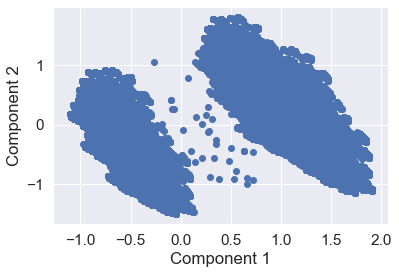

In [35]:
#PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_model_norm)
X_pca2 = pca2.transform(X_model_norm) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2');


In [36]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_model_norm)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_model_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.151265,0.151265
1,2,0.088904,0.240169
2,3,0.078242,0.318411
3,4,0.071452,0.389862
4,5,0.065349,0.455211
5,6,0.061781,0.516992
6,7,0.054699,0.571691
7,8,0.051644,0.623335
8,9,0.045329,0.668664
9,10,0.040983,0.709647


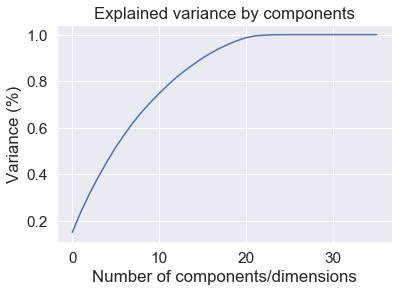

In [37]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

In [38]:
#Modeling Kmeans based on 21 PCAs

pca_reduced = PCA(n_components = 21)
pca_reduced.fit(X_model_norm)
X_pca_reduced = pca_reduced.transform(X_model_norm) 
print(X_pca_reduced.shape)

(72918, 21)


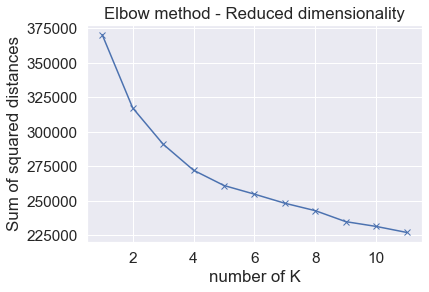

In [39]:
# Select K based on the sum of squared distances 

ssd = [] 

K = range(1,12) 

for k in K: 

    km = KMeans(n_clusters=k, random_state=123) 

    km = km.fit(X_pca_reduced) 

    ssd.append(km.inertia_) 

# Plot results in an elbow graph 

plt.plot(K, ssd, 'bx-') 

plt.xlabel('number of K') 

plt.ylabel('Sum of squared distances') 

plt.title('Elbow method - Reduced dimensionality') 

plt.show() 

   

In [40]:
# Apply the K-Means for K= 6 based on first 2 PC .... #fixed random_state!  6
K= 6

kmeans = KMeans(n_clusters=K, random_state=120
            ) 

kmeans.fit(X_pca_reduced) 

y_kmeans = kmeans.predict(X_pca_reduced) 

X_model["Cluster"]=y_kmeans
#add cluster to x-new

In [41]:
X_model.Cluster.value_counts()

5    15793
1    13448
3    12943
4    10538
0    10099
2    10097
Name: Cluster, dtype: int64

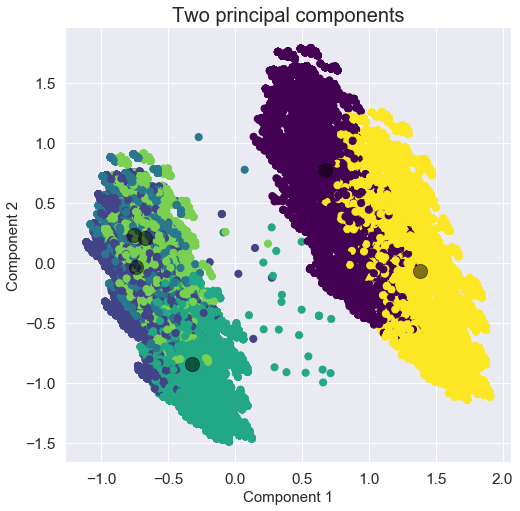

In [42]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [43]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X_model_norm.columns)
wheightsDF

,PricePerNight,OtherRevenuePerPersonNight,SRLocation,SREquipment,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,Nationality2_DEU,Nationality2_EU,...,DaysSinceCreationBinned_0-120,DaysSinceCreationBinned_121-365,DaysSinceCreationBinned_366-730,DaysSinceCreationBinned_731+,PersonPerRoomBinned_1,PersonPerRoomBinned_2,PersonPerRoomBinned_3+,AvgNightsBinning_1-2,AvgNightsBinning_3-4,AvgNightsBinning_5+
0,0.005983,5.243450e-04,-3.495698e-02,-1.701321e-01,0.043335,0.044783,0.014726,-0.102844,-0.021006,0.021785,...,-0.008822,0.038959,0.022643,-0.052781,0.385151,-0.504755,0.119604,0.202041,-0.170675,-0.031366
1,0.003453,-7.225100e-04,3.018070e-02,-2.685170e-02,-0.019592,-0.049523,-0.005298,0.074412,-0.028213,0.172807,...,-0.003361,-0.017754,0.012559,0.008557,-0.030469,-0.204048,0.234516,-0.513870,0.503828,0.010042
2,0.001660,-1.087382e-03,-9.556046e-03,3.038745e-02,-0.002774,-0.002692,0.003566,0.001900,-0.076591,0.094536,...,-0.001294,0.119964,0.209611,-0.328280,0.059008,-0.014966,-0.044042,-0.227932,0.271907,-0.043975
3,-0.002919,-5.985176e-04,7.985776e-04,-1.514214e-02,-0.005151,-0.049941,-0.005397,0.060489,-0.040057,0.037572,...,-0.039196,-0.135170,-0.509791,0.684158,-0.065088,-0.070741,0.135829,-0.007995,0.027864,-0.019870
4,0.009520,-6.617548e-04,4.835616e-02,3.252577e-01,-0.043230,-0.071562,-0.010730,0.125521,0.039071,-0.064892,...,0.076693,-0.049045,0.123901,-0.151550,-0.233506,-0.146816,0.380322,0.055339,-0.148004,0.092664
5,0.008760,-1.362401e-03,2.493509e-02,9.568559e-02,-0.017396,0.078319,-0.004159,-0.056765,-0.112689,0.059889,...,-0.015272,-0.003381,0.129960,-0.111307,-0.223513,-0.004748,0.228261,0.246554,-0.321683,0.075130
6,0.006526,-9.930798e-04,-5.721261e-02,-4.228890e-01,0.032639,0.428348,0.006199,-0.467186,-0.131013,0.327198,...,-0.008990,-0.042692,0.049530,0.002152,-0.185475,0.075676,0.109799,-0.037325,0.028948,0.008377
7,-0.001272,3.683071e-04,-9.730514e-02,-3.297766e-01,0.008754,0.193915,-0.000908,-0.201760,0.155831,-0.749807,...,0.008787,0.025662,-0.005510,-0.028939,-0.066905,-0.031427,0.098332,-0.117500,0.102808,0.014692
8,0.004480,-6.566316e-04,6.179223e-02,4.091943e-01,0.011536,0.105139,0.003018,-0.119693,-0.160094,-0.197664,...,-0.011558,0.293148,-0.226316,-0.055274,-0.050959,0.008204,0.042755,-0.008777,0.202680,-0.193903
9,-0.003179,1.377864e-03,-1.145861e-02,2.933233e-02,-0.005892,0.122532,0.002645,-0.119285,0.104747,0.123781,...,0.100236,0.596545,-0.501032,-0.195749,0.022266,-0.008312,-0.013954,-0.158381,-0.207479,0.365860


In [46]:
# Study the weights of component 21
comp = abs(wheightsDF.iloc[20]) 
comp = comp.sort_values(ascending=False)
comp

AgeBinned_0-24                               0.827235
AgeBinned_65+                                0.360696
AgeBinned_25-44                              0.235986
AgeBinned_45-64                              0.230553
DaysSinceCreationBinned_0-120                0.220695
DaysSinceCreationBinned_731+                 0.081209
DaysSinceCreationBinned_366-730              0.069876
DaysSinceCreationBinned_121-365              0.069611
Nationality2_PRT                             0.044790
Nationality2_DEU                             0.041170
Nationality2_ROW                             0.037906
LeadTimeBinned_121-365                       0.033418
AvgNightsBinning_5+                          0.028859
LeadTimeBinned_366+                          0.025549
AvgNightsBinning_1-2                         0.021772
Nationality2_EU                              0.020844
Nationality2_FRA                             0.019991
GroupSizeBinned_1                            0.018800
PersonPerRoomBinned_1       

In [47]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_model[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4,5
AgeBinned_0-24,0.072879,0.065586,0.041002,0.050143,0.073733,0.021592
AgeBinned_65+,0.047529,0.265467,0.183124,0.145561,0.135320,0.114988
AgeBinned_25-44,0.356372,0.207689,0.353768,0.459322,0.375403,0.418920
AgeBinned_45-64,0.523220,0.461258,0.422106,0.344974,0.415544,0.444501
DaysSinceCreationBinned_0-120,0.089613,0.128346,0.000000,0.041644,0.083792,0.046350
DaysSinceCreationBinned_731+,0.509258,0.466463,1.000000,0.531948,0.000000,0.404546
DaysSinceCreationBinned_366-730,0.269235,0.277662,0.000000,0.282624,0.526855,0.305262
DaysSinceCreationBinned_121-365,0.131894,0.127528,0.000000,0.143784,0.389353,0.243842
Nationality2_PRT,0.079810,0.040526,0.055561,0.180715,0.039002,0.153169
Nationality2_DEU,0.097336,0.244720,0.120333,0.096423,0.126779,0.139555


In [48]:
X_new.AgeBinned.value_counts()

45-64    31613
25-44    26481
65+      11025
0-24      3799
Name: AgeBinned, dtype: int64